In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#load the first dataset
d = pd.read_csv('data/LogisticRegressionData/ex2data1.csv',names=['x1','x2','target'],header=None)
d

,x1,x2,target
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


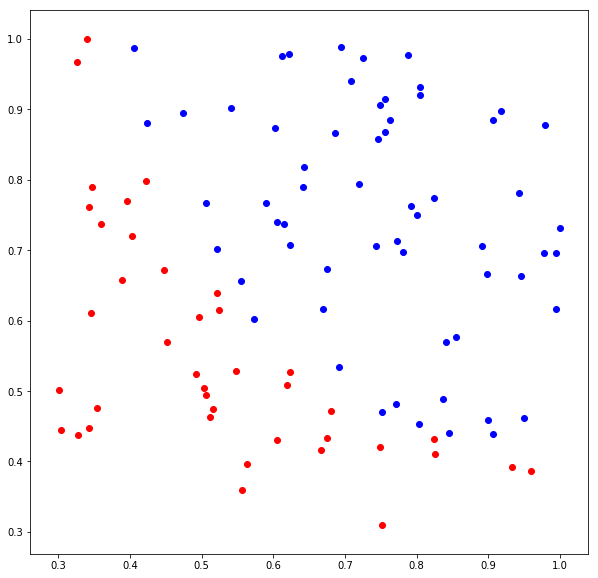

In [3]:
#create the arrays 
x = np.array([np.ones(len(d.x1)),d.x1 / np.amax(d.x1),d.x2 / np.amax(d.x2)]).T
y = np.array(d.target)
onesX = []
zerosX = []
onesY = []
zerosY = []
for i in range(100):
    if y[i] == 0:
        zerosX.append(d.x1[i] /  np.amax(d.x1))
        zerosY.append(d.x2[i] / np.amax(d.x2))
    elif y[i] == 1:
        onesX.append(d.x1[i] /  np.amax(d.x1))
        onesY.append(d.x2[i] / np.amax(d.x2))
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.scatter(zerosX,zerosY,color='red')
plt.scatter(onesX,onesY,color='blue')
plt.show()

In [4]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

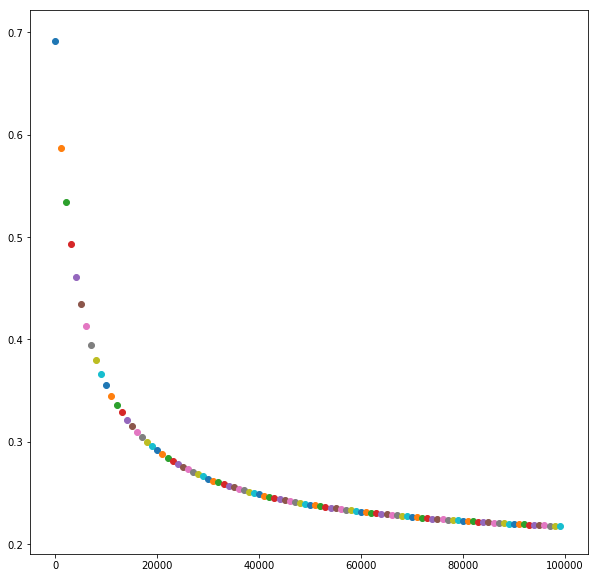

In [5]:
#fit the model
fig = plt.gcf()
fig.set_size_inches(10,10)
b = np.zeros(3)
lr = 0.03
predict = sigmoid(x@b)
for i in range(100000):
    grad = (x.T @ (predict - y)) / y.size
    b -= (grad * lr)
    predict = sigmoid(x@b)
    loss = np.mean(-y*np.log(predict)-(1-y)*(np.log(1-predict)))
    if i % 1000 == 0:
        plt.scatter(i,loss)
plt.show()

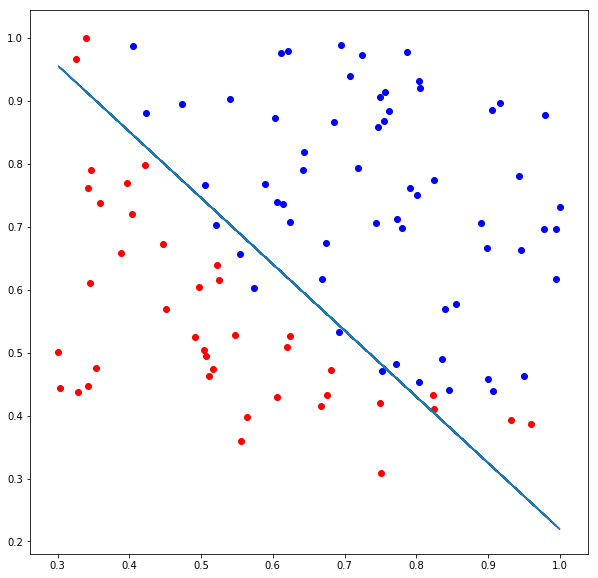

In [6]:
#plot the desicion boundary
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.plot(x[:,1],((-b[0] - (x[:,1]*b[1]))/b[2]))
plt.scatter(zerosX,zerosY,color='red')
plt.scatter(onesX,onesY,color='blue')
plt.show()
#plt.scatter(x[:,1],y)
#plt.plot(x[:,1],)

In [7]:
print(sigmoid(b[0] + b[1]*(45/np.amax(d.x1)) + b[2]*(85/np.amax(d.x2))))

0.6961542104535364


In [8]:
#load the second dataset
d2 = pd.read_csv('data/LogisticRegressionData/ex2data2.csv',names=['x1','x2','target'],header=None)
d2

,x1,x2,target
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1
8,0.016705,-0.404240,1
9,0.131910,-0.513890,1


In [9]:
def MapFeature(X1,X2,degree):
    out = np.ones((X1.shape[0], sum(range(degree + 2))))
    curr_column = 1
    for i in range(1, degree + 1):
        for j in range(i+1):
            out[:,curr_column] = np.power(X1,i-j) * np.power(X2,j)
            curr_column += 1
    return out
x1 = np.array([1,2,3,4])
x2 = np.array([4,3,2,1])
print(MapFeature(x1,x2,3))

[[ 1.  1.  4.  1.  4. 16.  1.  4. 16. 64.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]
 [ 1.  3.  2.  9.  6.  4. 27. 18. 12.  8.]
 [ 1.  4.  1. 16.  4.  1. 64. 16.  4.  1.]]


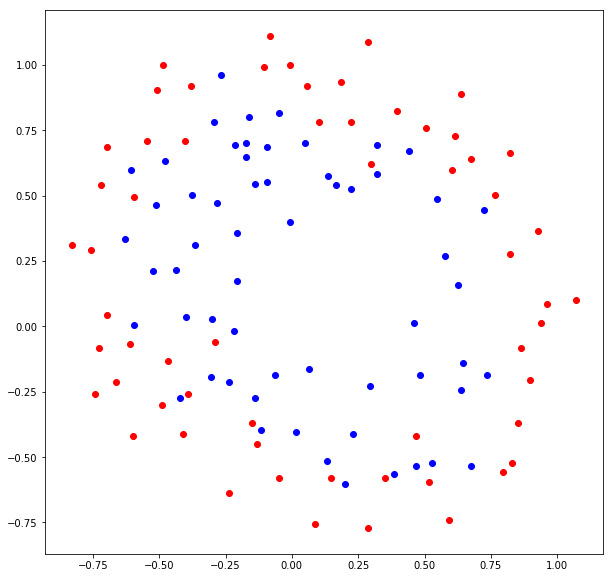

In [10]:
#create the arrays 
x = MapFeature(d2.x1,d2.x2,6)#np.array([np.ones(len(d2.x1)),d2.x1,d2.x2,(d2.x1*d2.x2),d2.x1**2,d2.x2**2,(d2.x1*d2.x2)**2,d2.x1**3,d2.x2**3,(d2.x1*d2.x2)**3,d2.x1**4,d2.x2**4,(d2.x1*d2.x2)**4,d2.x1**5,d2.x2**5,(d2.x1*d2.x2)**5,d2.x1**6,d2.x2**6]).T#d2.x1**6,d2.x2**6''']).T
y = np.array(d2.target)
onesX = []
zerosX = []
onesY = []
zerosY = []
for i in range(117):
    if y[i] == 0:
        zerosX.append(d2.x1[i])
        zerosY.append(d2.x2[i])
    elif y[i] == 1:
        onesX.append(d2.x1[i])
        onesY.append(d2.x2[i])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.scatter(zerosX,zerosY,color='red')
plt.scatter(onesX,onesY,color='blue')
plt.show()

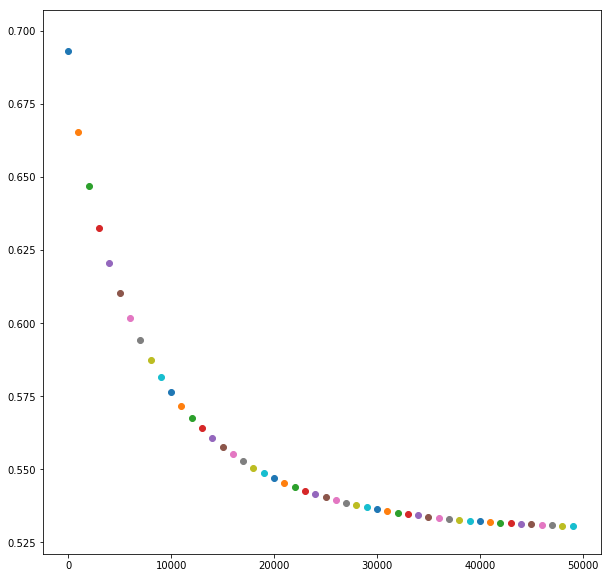

In [11]:
#fit the model
fig = plt.gcf()
fig.set_size_inches(10,10)
b = np.zeros(28)
lr = 0.003
lamb = 1
predict = sigmoid(x@b)
for i in range(50000):
    regulGD = (lamb/y.size) * b
    regulGD[0] = 0.0
    grad = ((x.T @ (predict - y)) / y.size) + regulGD
    b -= (grad * lr)
    predict = sigmoid(x@b)
    bRegul = b**2
    bRegul[0] = 0.0
    regulLoss = (lamb/(2*y.size)) * np.sum(bRegul)
    loss = np.mean(-y*np.log(predict)-(1-y)*(np.log(1-predict))) + regulLoss
    if i % 1000 == 0:
        plt.scatter(i,loss)
plt.show()

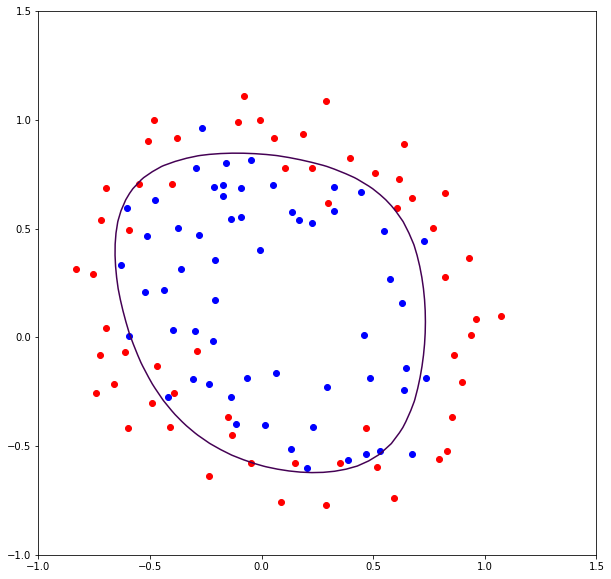

In [117]:
#plot the desicion boundary
fig = plt.gcf()
fig.set_size_inches(10,10)
u = np.linspace(-1, 1.5,50)
v = np.linspace(-1, 1.5,50)
z = np.zeros((len(u),len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = MapFeature(np.array([u[i]]),np.array([v[j]]),6) @ b
plt.contour(u,v,z.T,levels=[0])
plt.scatter(zerosX,zerosY,color='red')
plt.scatter(onesX,onesY,color='blue')
plt.show()